# SVR (Support Vector Regression)

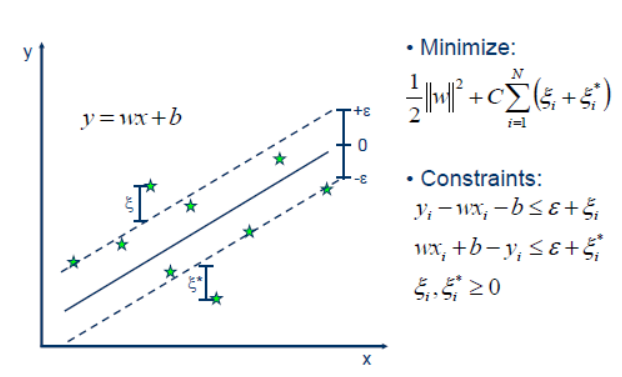

## Linear Model

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

### Model

In [2]:
from sklearn.svm import SVR

In [3]:
X_train = pd.DataFrame(X_train['Hits'])
X_test = pd.DataFrame(X_test['Hits'])

In [4]:
svr_model = SVR('linear').fit(X_train, y_train)

In [5]:
svr_model.coef_

array([[4.9695122]])

### Prediction

In [6]:
y_pred = svr_model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [9]:
r2_score(y_test, y_pred)

0.026689303489502936

### Model Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [12]:
svr_cv.best_params_

{'C': 0.1}

In [13]:
svr_tuned = SVR('linear', C=svr_cv.best_params_['C']).fit(X_train, y_train)

In [14]:
y_pred = svr_tuned.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [16]:
r2_score(y_test, y_pred)

0.030162956435925148

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
svr_params = {"C": np.arange(0.1, 2, 0.5)}
svr_cv = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [20]:
svr_cv.best_params_

{'C': 0.1}

In [21]:
svr_tuned = SVR('linear', C=svr_cv.best_params_['C']).fit(X_train, y_train)

In [22]:
y_pred = svr_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.960797346887

In [24]:
r2_score(y_test, y_pred)

0.3745484692973998

## Nonlinear

### Model

In [25]:
svr_rbf = SVR('rbf').fit(X_train, y_train)

### Prediction

In [26]:
y_pred = svr_rbf.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

### Model Tuning

In [28]:
svr_params = {"C": [.1, .4, 5, 10, 20, 30, 40, 50, 3000, 3500, 4000]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10).fit(X_train, y_train)

In [29]:
svr_cv_model.best_params_

{'C': 3500}

In [30]:
svr_tuned = SVR("rbf", C=svr_cv_model.best_params_['C'])

In [31]:
svr_tuned.fit(X_train, y_train)

SVR(C=3500)

In [32]:
y_pred = svr_tuned.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

379.5068850231961

In [34]:
r2_score(y_test, y_pred)

0.33468107711518336